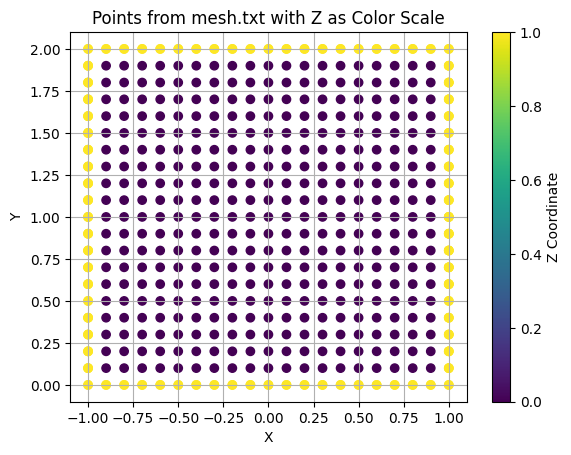

In [188]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt

# Чтение данных из файла с учетом третьей координаты
points = []
try:
    with open('mesh.txt', 'r') as file:
        for line in file:
            try:
                x, y, z = map(float, line.split())
                points.append((x, y, z))
            except ValueError:
                print(f"Строка пропущена из-за ошибки формата: {line.strip()}")
except FileNotFoundError:
    print("Файл 'mesh.txt' не найден.")
    points = []

# Проверка, есть ли данные для обработки
if points:
    # Разделение координат на x, y и z
    x_coords, y_coords, z_coords = zip(*points)

    # Построение графика с цветовой шкалой
    plt.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', marker='o')
    plt.colorbar(label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from mesh.txt with Z as Color Scale')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для отображения.")

In [189]:
import numpy as np

# Устанавливаем порог для определения близости точек
epsilon = 1e-6

# Преобразуем список точек в массив numpy для удобства вычислений
points_array = np.array(points)

# Проверяем наличие одинаковых или близких точек
duplicates = []
for i, point in enumerate(points_array):
    distances = np.linalg.norm(points_array - point, axis=1)
    close_points = np.where((distances < epsilon) & (distances > 0))[0]
    if len(close_points) > 0:
        duplicates.append((i, close_points.tolist()))

# Выводим результаты
if duplicates:
    print("Найдены одинаковые или близкие точки:")
    for idx, close_idxs in duplicates:
        print(f"Точка {points[idx]} близка к точкам {[points[i] for i in close_idxs]}")
else:
    print("Одинаковых или близких точек не найдено.")

Одинаковых или близких точек не найдено.


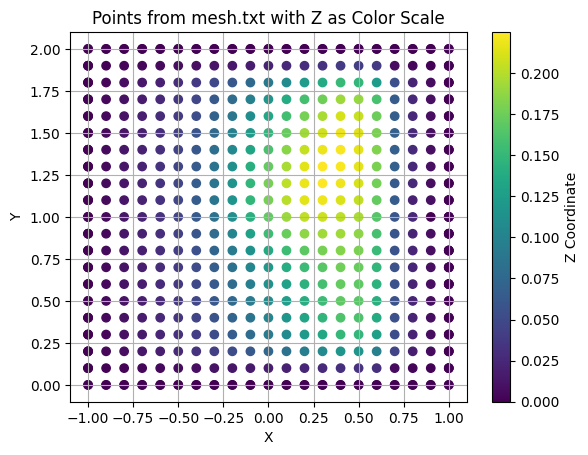

In [190]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt

# Чтение данных из файла с учетом третьей координаты
points = []
try:
    with open('output.txt', 'r') as file:
        for line in file:
            try:
                x, y, z = map(float, line.split())
                points.append((x, y, z))
            except ValueError:
                print(f"Строка пропущена из-за ошибки формата: {line.strip()}")
except FileNotFoundError:
    print("Файл 'output.txt' не найден.")
    points = []

# Проверка, есть ли данные для обработки
if points:
    # Разделение координат на x, y и z
    x_coords, y_coords, z_coords = zip(*points)

    # Построение графика с цветовой шкалой
    plt.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', marker='o')
    plt.colorbar(label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from mesh.txt with Z as Color Scale')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для отображения.")


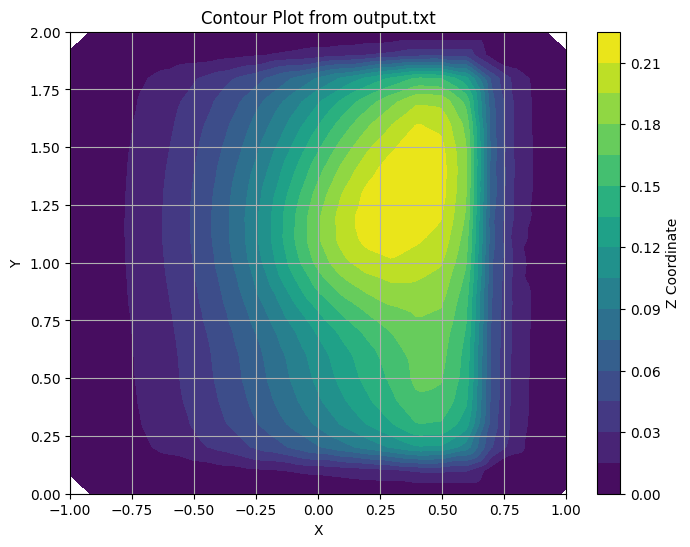

In [191]:
from scipy.interpolate import griddata

# Проверяем, есть ли данные для построения
if points:
    # Преобразуем координаты в массивы numpy
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    z_coords = np.array(z_coords)

    # Создаем сетку для построения линий уровня
    grid_x, grid_y = np.meshgrid(
        np.linspace(x_coords.min(), x_coords.max(), 100),
        np.linspace(y_coords.min(), y_coords.max(), 100)
    )

    # Интерполируем значения z для сетки
    grid_z = griddata((x_coords, y_coords), z_coords, (grid_x, grid_y), method='linear')

    # Построение линий уровня
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot from output.txt')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для построения линий уровня.")

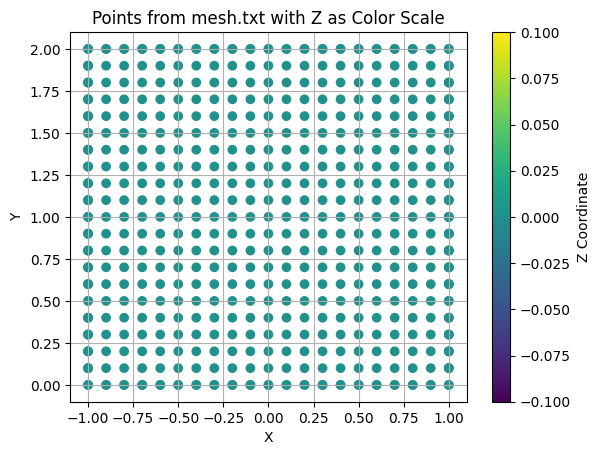

In [192]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt

# Чтение данных из файла с учетом третьей координаты
points = []
try:
    with open('output_init.txt', 'r') as file:
        for line in file:
            try:
                x, y, z = map(float, line.split())
                points.append((x, y, z))
            except ValueError:
                print(f"Строка пропущена из-за ошибки формата: {line.strip()}")
except FileNotFoundError:
    print("Файл 'output_init.txt' не найден.")
    points = []

# Проверка, есть ли данные для обработки
if points:
    # Разделение координат на x, y и z
    x_coords, y_coords, z_coords = zip(*points)

    # Построение графика с цветовой шкалой
    plt.scatter(x_coords, y_coords, c=z_coords, cmap='viridis', marker='o')
    plt.colorbar(label='Z Coordinate')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from mesh.txt with Z as Color Scale')
    plt.grid(True)
    plt.show()
else:
    print("Нет данных для отображения.")